In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/jellyfish-types")

print("Path to dataset files:", path)

C:\Users\jungf\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jungf\.cache\kagglehub\datasets\anshtanwar\jellyfish-types\versions\16


In [2]:
import pandas as pd
import os

#Create Files_Name
image_data= os.path.join(path,'Train_Test_Valid/Train')
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,barrel_jellyfish
1,blue_jellyfish
2,compass_jellyfish
3,lions_mane_jellyfish
4,mauve_stinger_jellyfish
5,Moon_jellyfish


In [4]:
#Create Files_Name
image_valid_data=os.path.join(path,'Train_Test_Valid/valid')
pd.DataFrame(os.listdir(image_valid_data),columns=['Files_Name'])

,Files_Name
0,barrel_jellyfish
1,blue_jellyfish
2,compass_jellyfish
3,lions_mane_jellyfish
4,mauve_stinger_jellyfish
5,Moon_jellyfish


In [5]:
import glob
import numpy as np

# Define a function to create the dataframe
def create_dataframe(image_folder):
    files = glob.glob(os.path.join(image_folder, '**', '*.*'), recursive=True)  # Search for all files recursively
    np.random.shuffle(files)  # Shuffle the files
    labels = [os.path.basename(os.path.dirname(f)) for f in files]  # Extract labels from folder names
    return pd.DataFrame({'Image': files, 'Label': labels})

# Create train and validation dataframes
dataframe_train = create_dataframe(image_data)
dataframe_valid = create_dataframe(image_valid_data)

Dataset                   Training  Validation
Label                                         
Moon_jellyfish           16.666667   15.384615
barrel_jellyfish         16.666667   12.820513
blue_jellyfish           16.666667   17.948718
compass_jellyfish        16.666667   17.948718
lions_mane_jellyfish     16.666667   17.948718
mauve_stinger_jellyfish  16.666667   17.948718


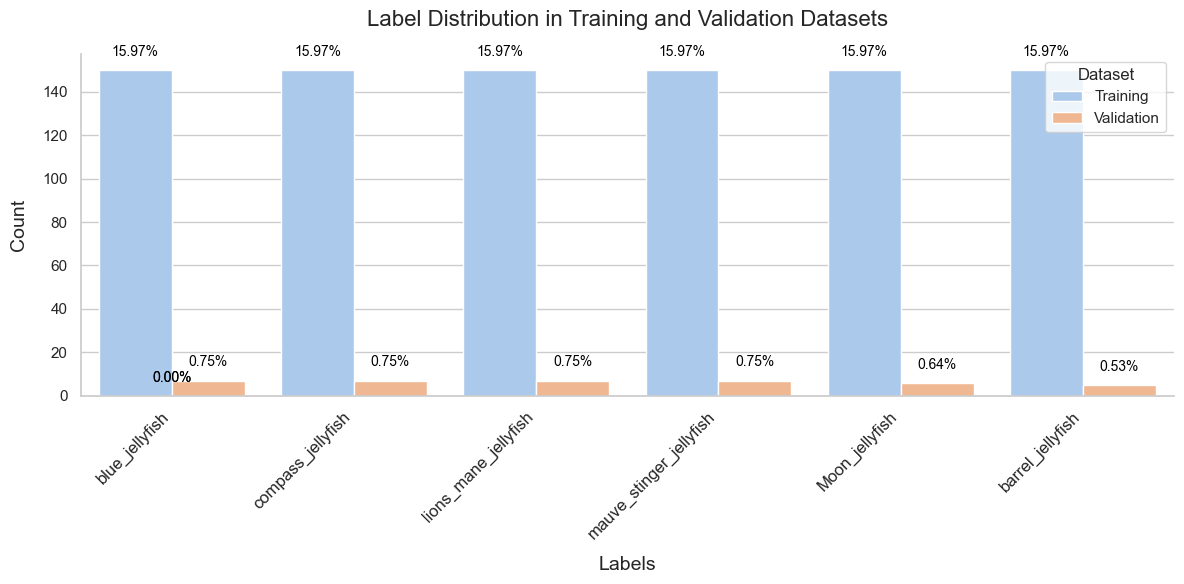

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Add a column to differentiate between train and validation datasets
dataframe_train['Dataset'] = 'Training'
dataframe_valid['Dataset'] = 'Validation'

# Combine the two dataframes
combined_df = pd.concat([dataframe_train, dataframe_valid], ignore_index=True)

# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Calculate counts and percentages for each label in each dataset
count_data = combined_df.groupby(['Label', 'Dataset']).size().unstack(fill_value=0)
percentage_data = count_data.div(count_data.sum(axis=0), axis=1) * 100

# Print the percentage data (optional)
print(percentage_data)

# Create a color palette for the bars
palette = sns.color_palette("pastel", len(count_data))

# Plot the count plot for both training and validation sets
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_df, x="Label", hue="Dataset", order=count_data.sum(axis=1).sort_values(ascending=False).index, palette="pastel")

# Annotate each bar with the percentage value
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    percentage = f'{(height / len(combined_df)) * 100:.2f}%'  # Calculate percentage
    ax.annotate(percentage,  # The label to be annotated
                (p.get_x() + p.get_width() / 2., height),  # Position of the label
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

# Rotate x-axis labels for better visibility and set the label font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add title and labels with improved fonts and padding
plt.title("Label Distribution in Training and Validation Datasets", fontsize=16, pad=20)
plt.xlabel("Labels", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [7]:
import tensorflow as tf

batch_size = 16
target_size = (224,224)
train= tf.keras.preprocessing.image_dataset_from_directory(
    image_data,
    validation_split=None,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    image_valid_data,
    validation_split=None,
    image_size=target_size,
    batch_size=batch_size,
)

Found 900 files belonging to 6 classes.
Found 39 files belonging to 6 classes.


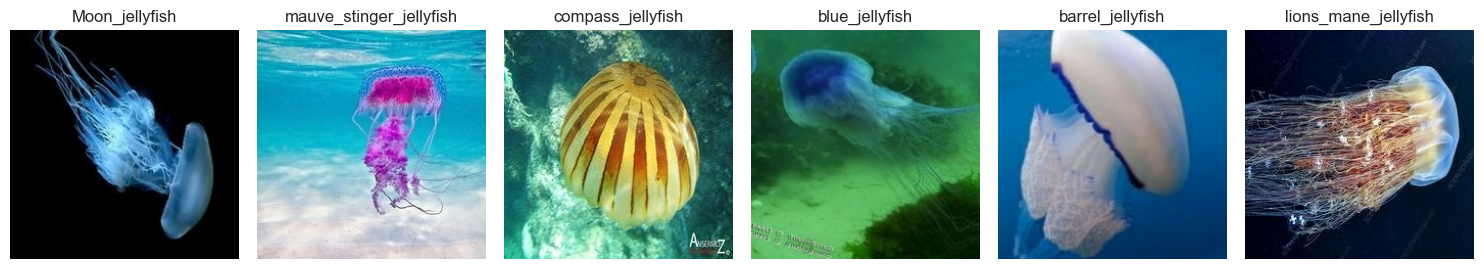

In [ ]:
# Get the class names from the training dataset
class_labels = train.class_names

# Set up the figure size for displaying images (adjusted for the number of classes)
plt.figure(figsize=(15, 10))

# Track the classes already shown
shown_classes = set()

# Take one batch from the train dataset
for images, labels in train.take(1):
    for i in range(len(images)):  # Loop through the batch
        class_name = class_labels[labels[i]]
        if class_name not in shown_classes:
            # Plot the image only if its class has not been shown yet
            ax = plt.subplot(1, 6, len(shown_classes) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            shown_classes.add(class_name)
        
        # Stop once all classes have been displayed
        if len(shown_classes) == len(class_labels):
            break

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()